In [ ]:
# CODE to test if chord diagrams are working as expected
from matplotlib import cm
import pycircos
import pprint

import fconfig as cfg


In [ ]:
def PlotParts(rows,interspace=cfg.INTERSPACE):
    '''  partid, length, color_name = row '''
    # plot circle
    circ = pycircos.Gcircle() 
    for row in rows:
        partid,length,color = row
        # if length>1:
        arcc = pycircos.Garc(
                arc_id=partid, 
                size=length, 
                facecolor=color,
                interspace=interspace, 
                raxis_range=(950,1000), 
                labelsize=20,labelposition=60, label_visible=True)
        circ.add_garc(arcc) 
    circ.set_garcs(0,360) # this displays the circle
    return circ  


def PlotNetworks(rows, circ,color_dict ):
    # WARNING!!!! must pass in circ, if store self.circ will NOT DRAW
    ''' REQUIRES: 
                part,
                number of networks, 
                network start col within part
                width of network
                network id = color
    '''
    for row in rows:
        part, start, width, netw = row
        circ.barplot( 
                str(part), # partition is string!
                data = [1], # number to draw (only drawing 1 at a time)
                positions = [start], # col WITHIN PARTITION (NOT CIRCLE COL)
                width = [width],
                facecolor = [ color_dict[netw] ],

                raxis_range=[950,1000], 
            )
    return circ
    
def PlotNetworksColor(rows, circ ):
    ''' see above for defn. This uses passed in colors'''
    # WARNING!!!! must pass in circ, if store self.circ will NOT DRAW
    for row in rows:
        part, start, width, color = row
        circ.barplot( 
                str(part), # partition is string!
                data = [1], # number to draw (only drawing 1 at a time)
                positions = [start], # col WITHIN PARTITION (NOT CIRCLE COL)
                width = [width],
                facecolor = color,
                raxis_range=[950,1000], 
            )
    return circ

def PlotNetworksPart(part,starts_list, width_list, color_list, circ ):
    # WARNING!!!! must pass in circ, if store self.circ will NOT DRAW
    ''' REQUIRES: 
                part,
                number of networks, 
                network start col within part
                width of network
                network id = color
    '''
    # THIS CREATS ALL NETWORKS AT ONCE FOR EACH PARTITION - instead of one net row at atime
    circ.barplot( 
            str(part), # partition is string!
            data = [1]*len(starts_list), # number to draw (only drawing 1 at a time)
            positions = starts_list, # col WITHIN PARTITION (NOT CIRCLE COL)
            width = width_list,
            facecolor = color_list,
            raxis_range=[950,1000], 
            )
    return circ

def PlotChordsPart(part, rows,circ):
    for row in rows:
        part, (s_col, s_end, s_len), (d_col, d_end,d_len),color = row
        # for p,s,sw,d,dw,n,net in rows:
        # src = (str(p),s,sw,1000)
        # dest = (str(p),d,dw,1000)
        # print("++ DRAW: src",src,' DEST:',dest)
        # print(f'Part {p} src {s} dest {d}')

        # # print("ARC",src,dest,net)
        # color = COLOR_DICT[net]
        # if cfg.BLACK_LINES:
        #     color = 'black'
        circ.chord_plot(src, dest, facecolor=color)
        # if DBG_ARC and p>1:
        #     print(f"DEBUG: only Part={p} arcs")
        #     print(src,dest)
    return circ


In [ ]:
part_rows = [ ('A',100, 'blue'),
              ('B',100, 'pink')]
              
net_rows1  = [ ('A',0, 50, 1), #1,2 are keys in color dict
              ('B',0, 50, 2)]

net_rows  = [ ('A',0, 50, 'yellow'), 
              ('B',0, 50, 'orange')]

def vert(rows,pos):
    return [ row[pos] for row in rows ]

net_parts = vert(net_rows,0)
net_starts = vert(net_rows,1)
net_lens = vert(net_rows,2)
net_colr = vert(net_rows,3)
print(net_parts,net_starts,net_lens,net_colr)

In [ ]:
def test1():
    c1 = PlotParts(part_rows)
    c1.figure.suptitle("\n\n"+str(part_rows), fontsize=20)

    c2 = PlotParts(part_rows) 
    PlotNetworksColor(net_rows,c2)
    c2.figure.suptitle("\n\n"+str(net_rows), fontsize=20)
test1()

In [ ]:
# Plot 2 networks for A - shifted incorrectly
def test2():
    rows  = [   ('A',0, 50, 'yellow'), 
                ('A',51, 100, 'purple'), 
                ('B',0, 50, 'orange'),
                # ('B',51, 100, 'green'),
              ]
    # c1 = PlotParts(part_rows)
    # c1.figure.suptitle("\n\n"+str(part_rows), fontsize=20)
    c2 = PlotParts(part_rows) 
    PlotNetworksColor(rows,c2)
    c2.figure.suptitle("\n\n"+str(rows), fontsize=20)
test2()

In [ ]:
def test3():
    rows  = [ ('A',0, 50, 'yellow'), 
                ('A',50, 49, 'purple'), 
                # ('B',0, 50, 'orange'),
                # ('B',51, 100, 'green'),
              ]
    # c1 = PlotParts(part_rows)
    # c1.figure.suptitle("\n\n"+str(part_rows), fontsize=20)
    c = PlotParts(part_rows) 
    PlotNetworksColor(rows,c)
    c.figure.suptitle("\n\n"+str(rows), fontsize=20)
test3()

In [ ]:
def test4():
    rows  = [ ('A',0, 50, 'yellow'), 
                ('A',50, 49, 'purple'), 
                ('B',0, 50, 'orange'),
                ('B',50, 49, 'green'),
              ]
    # c1 = PlotParts(part_rows)
    # c1.figure.suptitle("\n\n"+str(part_rows), fontsize=20)
    c = PlotParts(part_rows) 
    PlotNetworksColor(rows,c)

    c.figure.suptitle("\n\n"+str(rows), fontsize=20)
test4()

In [ ]:
# NETWORK ROWS ARE CALCULATED DIFFRENTEY !!!
# start col is 0 (Not 1)
# next col in row is equal to previous COL+PREV_COL_WIDTH
# width is one less!!! 55+44 = 99
def test5():
    #             col wid
    rows  = [ ('A',0, 25, 'yellow'), 
              ('A',25, 30, 'purple'), #25+30=55
              ('A',55, 44, 'red'),    # 55+44 = 99

                ('B',0, 50, 'orange'),
                ('B',50, 49, 'green'),
              ]
    # c1 = PlotParts(part_rows)
    # c1.figure.suptitle("\n\n"+str(part_rows), fontsize=20)
    c = PlotParts(part_rows) 
    PlotNetworksColor(rows,c)

    c.figure.suptitle("\n\n"+str(rows), fontsize=20)
test5()

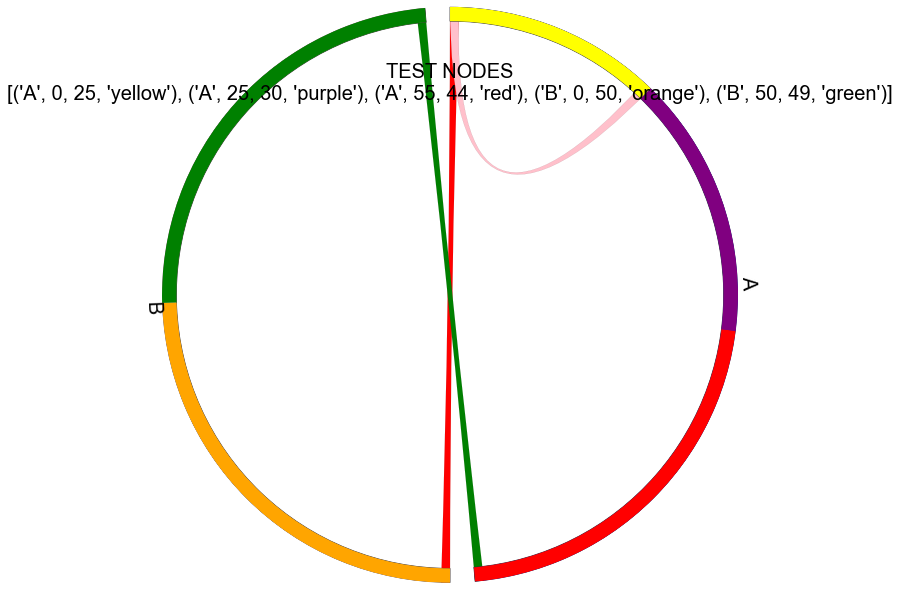

In [21]:
# NETWORK ROWS ARE CALCULATED DIFFRENTEY !!!
# start col is 0 (Not 1)
# next col in row is equal to previous COL+PREV_COL_WIDTH
# width is one less!!! 55+44 = 99
# part_rows = [ ('A',100, 'blue'),
#               ('B',100, 'pink')]
def test_nodes():
    #             col wid
    rows  = [ ('A',0, 25, 'yellow'), # 
              ('A',25, 30, 'purple'), #25+30=55
              ('A',55, 44, 'red'),    # 55+44 = 99

                ('B',0, 50, 'orange'),
                ('B',50, 49, 'green'),
              ]
    # c1 = PlotParts(part_rows)
    # c1.figure.suptitle("\n\n"+str(part_rows), fontsize=20)
    c = PlotParts(part_rows) 
    PlotNetworksColor(rows,c)

    c.figure.suptitle("\n\nTEST NODES\n"+str(rows), fontsize=20)

    # plot one node
    # for p,s,sw,d,dw,n,net in rows:
    nodes = [
        # test edges
        (('A', 0,1, 1000), ('B',0,1, 1000), 'red'),
        (('A', 0,1, 1000), ('A',24,25, 1000), 'pink'), # A25 - ONE LESS
        (('A', 98,99, 1000), ('B',98,99, 1000), 'green'), # A25 - ONE LESS

        # middle
        # (('A', 5,6, 1000), ('B',7,8, 1000), 'pink'),
        # (('A', 5,6, 1000), ('A',5,6, 1000), 'black'), # same start end - not drawn
    ]
    for n in nodes:
        src, dest, color = n
        c.chord_plot(src, dest, facecolor=color,linewidth=0.05)
    # src = ( 'A', 5,6, 1000 )
    # dest = ('B',7,8, 1000)
    # color='black'
    # c.chord_plot(src, dest, facecolor=color)
test_nodes()

In [ ]:
# TEST THAT PLOTTING VERTICALLY makes no difference
def test6():
    #             col wid
    rows  = [ ('A',0, 25, 'yellow'), 
              ('A',25, 30, 'purple'), 
               ('A',30, 10, 'pink'), 
              ]
 
    starts = vert(net_rows,1)
    lens = vert(net_rows,2)
    colr = vert(net_rows,3)

    # c1 = PlotParts(part_rows)
    # c1.figure.suptitle("\n\n"+str(part_rows), fontsize=20)
    c = PlotParts(part_rows) 
    PlotNetworksPart('A',starts, lens, colr, c )

    c.figure.suptitle("\n\n"+str(rows), fontsize=20)
# test6()

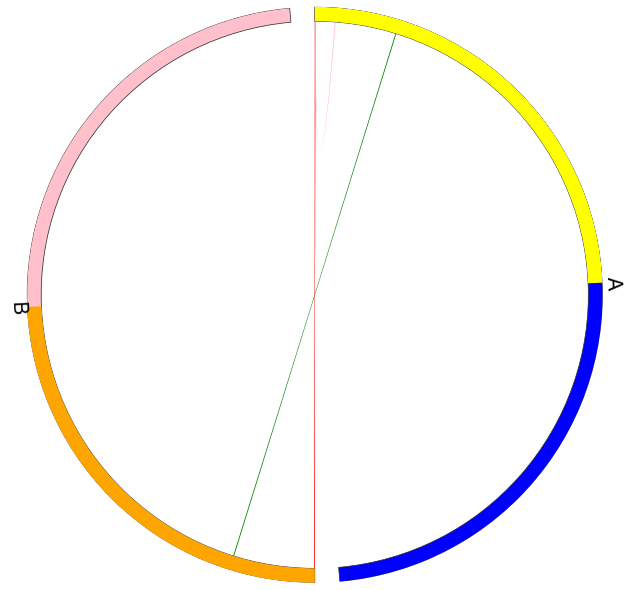

In [29]:
def test_big_parts():
    '''  lines ARE  thinner if more partitions'''
    part_rows = [ ('A',1000, 'blue'),
                ('B',1000, 'pink')]

    net_rows  = [ ('A',0, 500, 'yellow'), 
                ('B',0, 500, 'orange')]
    c = PlotParts(part_rows) 
    PlotNetworksColor(net_rows,c)

    nodes = [
        # test edges
        (('A', 0,1, 1000), ('B',0,1, 1000), 'red'),
        (('A', 0,1, 1000), ('A',24,25, 1000), 'pink'), # A25 - ONE LESS
        (('A', 98,99, 1000), ('B',98,99, 1000), 'green'), # A25 - ONE LESS

     ]
    for n in nodes:
        src, dest, color = n
        c.chord_plot(src, dest, facecolor=color)

test_big_parts()